In [72]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# load the data from csv file
data= pd.read_csv("heart.csv")
# print the first 10 rows of the dataframe
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data = data.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'serum_cholesterol','fbs': 'fasting_blood_sugar','restecg' : 'resting_electrocardiogram','thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina','oldpeak': 'st_depression', 'slope': 'slope_st_segment', 'ca':'num_major_vessels', 'thal': 'thalassemia'},
    errors="raise")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   serum_cholesterol          303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   resting_electrocardiogram  303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    int64  
 9   st_depression              303 non-null    float64
 10  slope_st_segment           303 non-null    int64  
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    int64  
 13  target                     303 non-null    int64  

In [10]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['slope_st_segment'][data['slope_st_segment'] == 0] = 'upsloping'
data['slope_st_segment'][data['slope_st_segment'] == 1] = 'flat'
data['slope_st_segment'][data['slope_st_segment'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   serum_cholesterol          303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  slope_st_segment           303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    int64  

In [74]:
# Check for missing values in the dataset
data.isnull().sum().sum()

0

In [12]:
# numerical features
num_features = ['age', 'resting_blood_pressure', 'serum_cholesterol','max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# categorical features
bin_features = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
nom_features= ['chest_pain_type', 'resting_electrocardiogram', 'slope_st_segment', 'thalassemia']
cat_features = nom_features + bin_features

In [13]:
# statistical summary for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
serum_cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


From the above analysis it can be inferred that
1. The average age of the patients is approximately 54.36 years, with the youngest being 29 and the oldest 77 years.
2. The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.
3. The average serum cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.
4. The average maximum heart rate achieved is around 149.64, with a range from 71 to 202.
5. The average st depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

In [14]:
# statistical summary for categorical features
data.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,slope_st_segment,thalassemia
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4
top,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,downsloping,normal
freq,207,143,258,152,204,142,166


From above it can be said that
1. There are two unique values, with male being the most frequent category, occurring 207 times out of 303 entries.
2. Four unique types of chest pain are present. The most common type is typical angina, occurring 143 times.
3. There are two categories for fasting blood sugar, and the most frequent one is less than 120 mg/dl, which appears 258 times.
4. Three unique results are present for resting electrocardiogram. The most common result is ST-T wave abnormality, appearing 152 times.
5. There are two unique values in exercise induced angina. The most frequent value is no exercise-induced angina, which is observed 204 times.
6. There are three unique slopes are present for slope st segment. The most frequent slope type is downslopping, which occurs 142 times.
7. Four unique results are available for thalssemia. The most common type is normal observed 166 times.


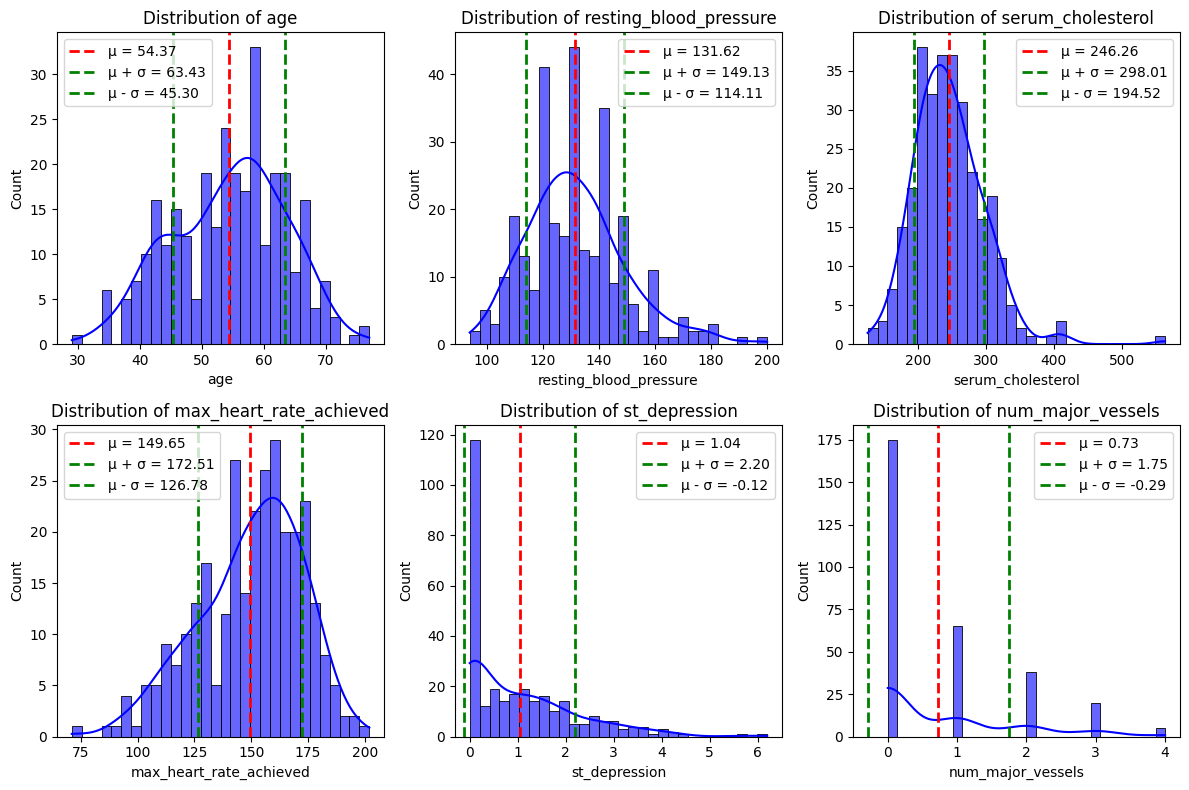

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
num_features = ['age', 'resting_blood_pressure', 'serum_cholesterol','max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through features and plot histograms with μ and σ
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)

    # Compute mean (μ) and standard deviation (σ)
    mu = np.mean(data[col])
    sigma = np.std(data[col])

    # Plot histogram with KDE
    sns.histplot(data[col], kde=True, bins=30, color="blue", alpha=0.6)

    # Plot vertical lines for mean and std deviation
    plt.axvline(mu, color="red", linestyle="dashed", linewidth=2, label=f"μ = {mu:.2f}")
    plt.axvline(mu + sigma, color="green", linestyle="dashed", linewidth=2, label=f"μ + σ = {mu+sigma:.2f}")
    plt.axvline(mu - sigma, color="green", linestyle="dashed", linewidth=2, label=f"μ - σ = {mu-sigma:.2f}")

    # Title and legend
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()



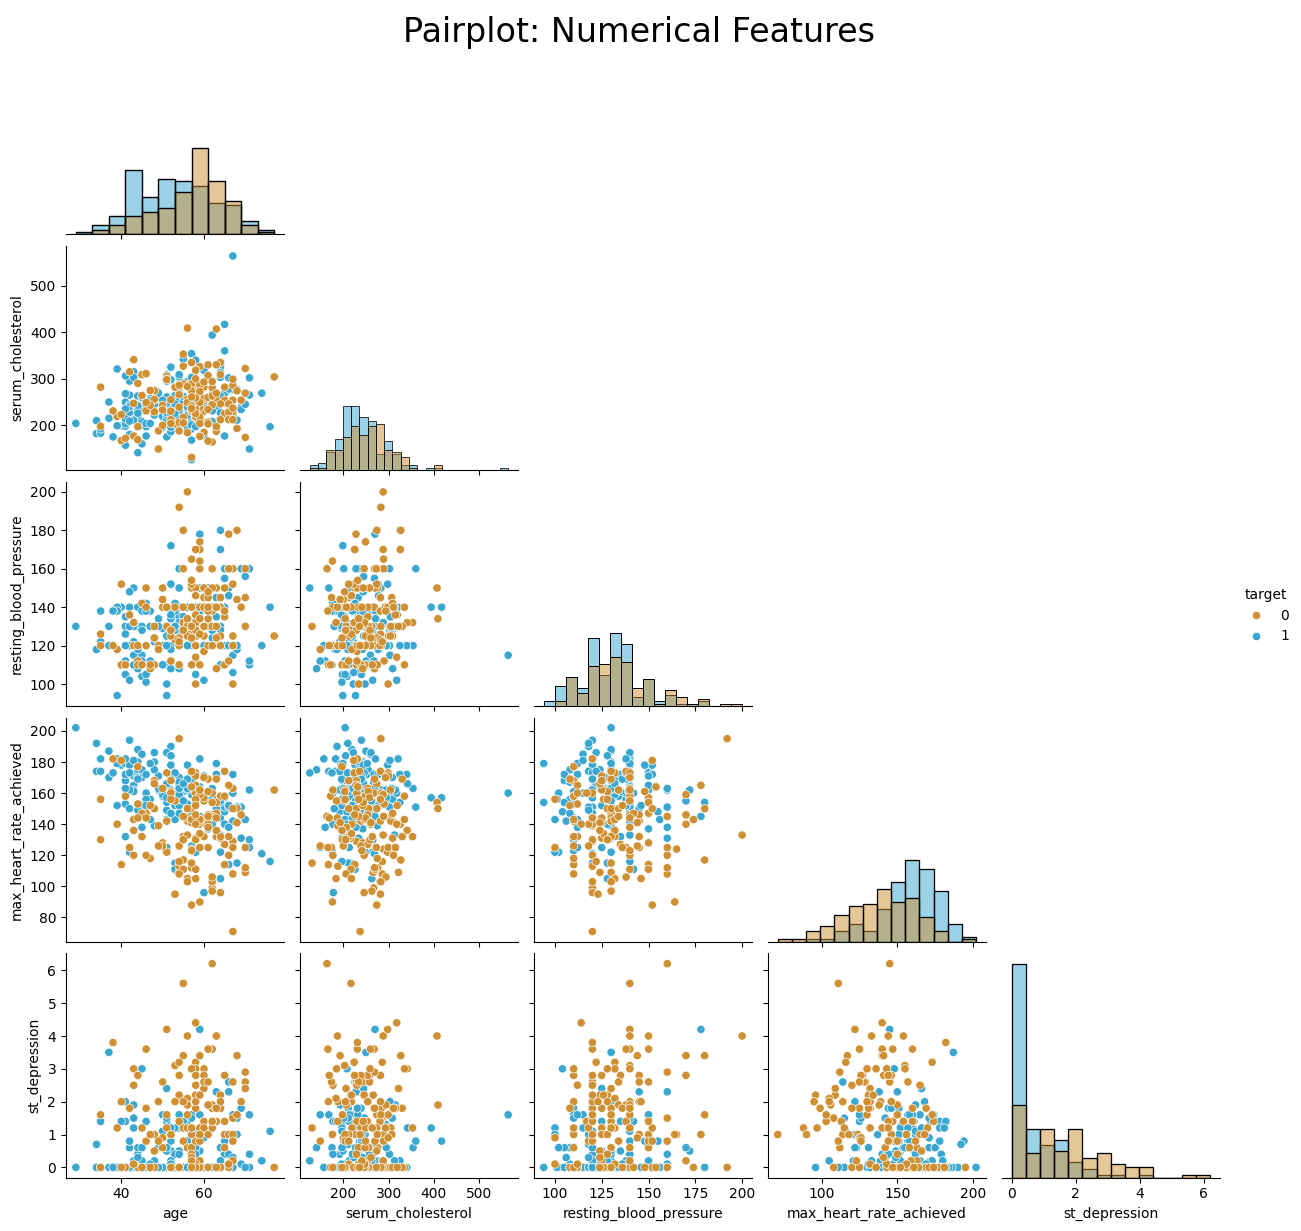

In [16]:
new_num = ['age', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_num = data[new_num]
# Define or import 'mypal'
mypal = sns.color_palette("husl", 8)
g = sns.pairplot(data_num, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

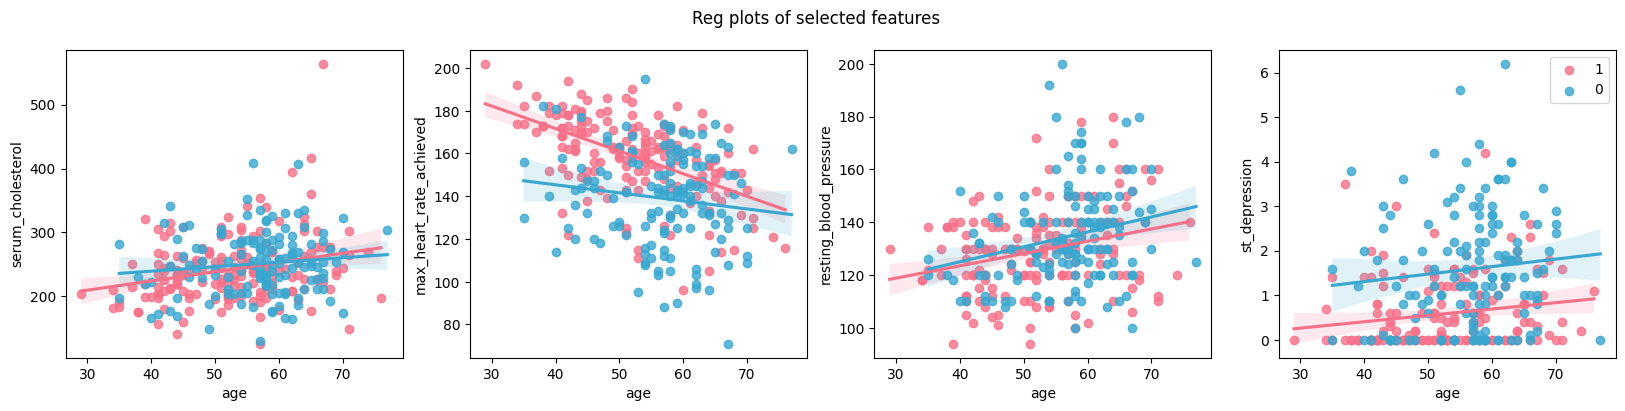

In [17]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='serum_cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='serum_cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

                              age  resting_blood_pressure  serum_cholesterol  \
age                      1.000000                0.279351           0.213678   
resting_blood_pressure   0.279351                1.000000           0.123174   
serum_cholesterol        0.213678                0.123174           1.000000   
max_heart_rate_achieved -0.398522               -0.046698          -0.009940   
st_depression            0.210013                0.193216           0.053952   
num_major_vessels        0.276326                0.101389           0.070511   
target                  -0.225439               -0.144931          -0.085239   

                         max_heart_rate_achieved  st_depression  \
age                                    -0.398522       0.210013   
resting_blood_pressure                 -0.046698       0.193216   
serum_cholesterol                      -0.009940       0.053952   
max_heart_rate_achieved                 1.000000      -0.344187   
st_depression           

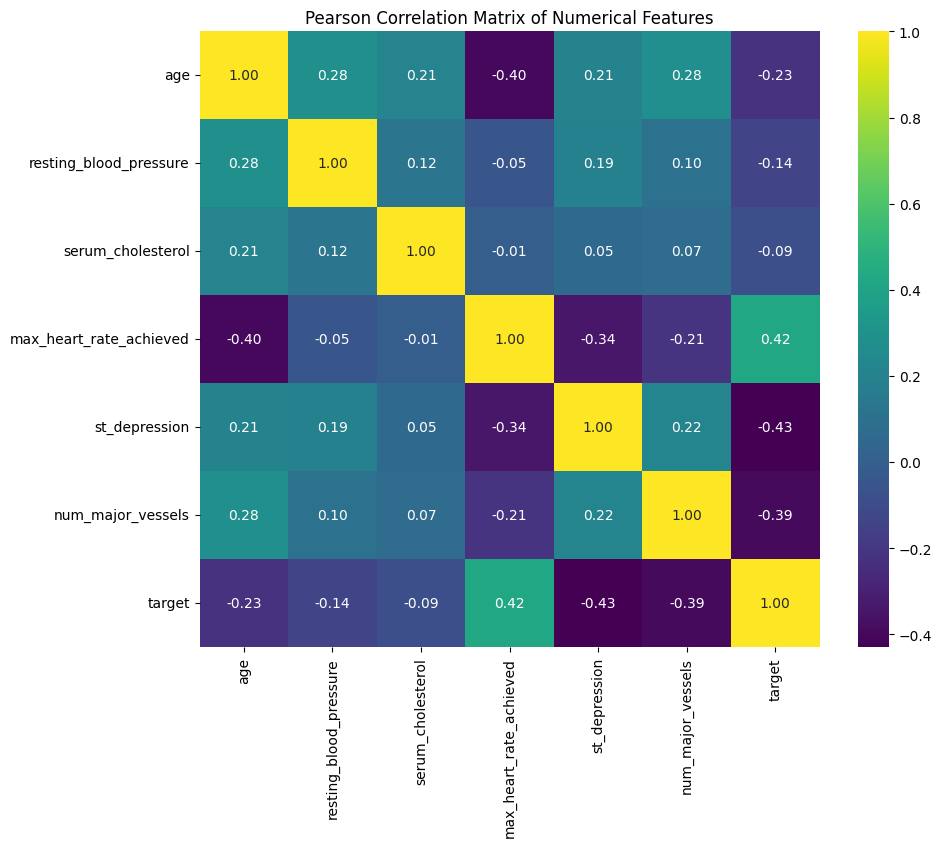

In [18]:
# correlation for numerical features
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

# visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()


Max-heart-rate-achieved has more correlation with target variable achieving value of 0.42.

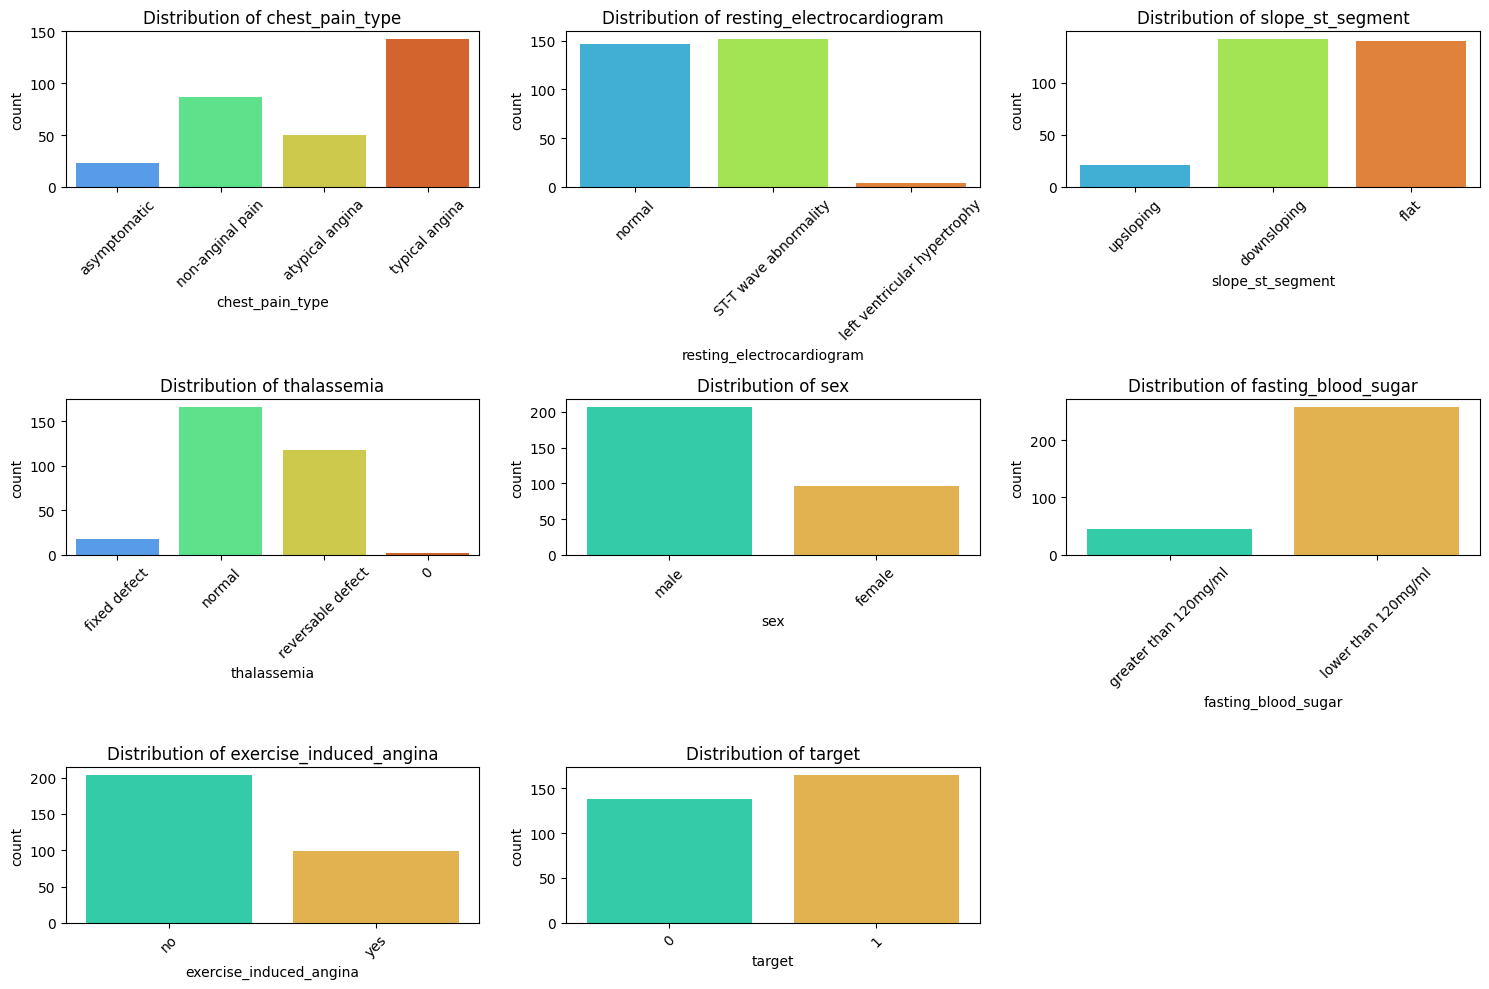

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
cat_features = nom_features + bin_features


plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, palette="turbo")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. More than 75% of the patients experience either typical angina or non-angina chest pain.
2. Patients with Left ventricular hypertrophy are the fewest.
3. Most patients have a downsloping or flat ST-Slope.
4. Most patients have a normal or reversable defect with thalassemia.
5. Patients with lower than 120mg/ml fasting blood sugar are the majority in the dataset.
6. Patients with history no exercise induced angina are higher in number.
7. There are more male patients compared to females in our dataset.

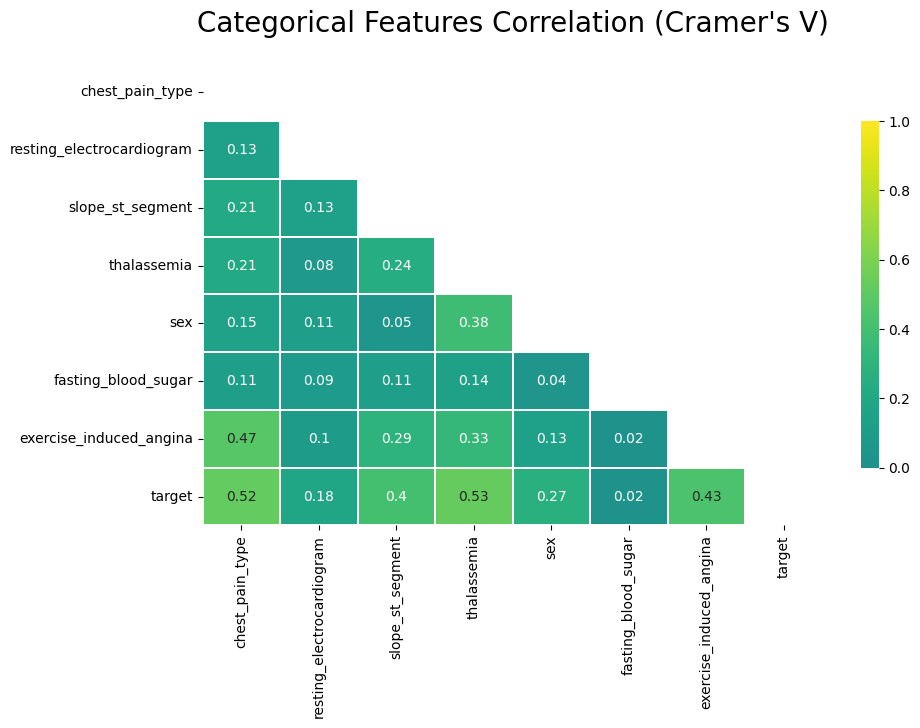

In [35]:
import scipy.stats as ss

# Computing Cramér’s V for two categorical variable
def cramers_v(x, y):
    """Compute Cramér’s V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# calculate the correlation coefficients using the above function
data_cat = data[cat_features]
rows= []
for x in data_cat:
    col = []
    for y in data_cat :
        cramers =cramers_v(data_cat[x], data_cat[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_cat.columns, index = data_cat.columns)

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=1.0, vmin=0, center=0, annot=True,square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

From the categorical features chest_pain_type, resting_electrocardiogram, thalassemia, and exercise_induced_angina are more correlated with the target variable, where thalassemia being the highest at 0.53.

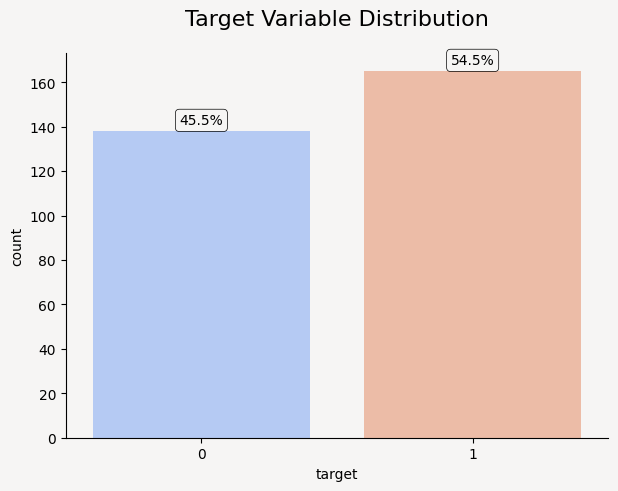

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5), facecolor='#F6F5F4')

num_colors = len(data['target'].unique())
palette = sns.color_palette("coolwarm", n_colors=num_colors)

ax = sns.countplot(x=data['target'], palette=palette) # Pass the list of colors to palette
ax.set_facecolor('#F6F5F4')

# Annotate percentages
total = len(data)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 3,
            f"{(p.get_height()/total)*100:.1f}%", ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title("Target Variable Distribution", fontsize=16, y=1.05)
sns.despine()

plt.show()

From the countplot it's observed that the target is fairly balanced with 45.5% with no heart disease and 54.5% with heart disease.

In [41]:
!pip install matplotlib-venn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import shap

def label_encoder(data, cat_features):

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = data[col].astype(str)  # Convert all values to string
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

    data = data_encoded

    return data

# split the data into train and test sets

cat_features = cat_features
data = label_encoder(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    MLPClassifier(random_state=seed),
]

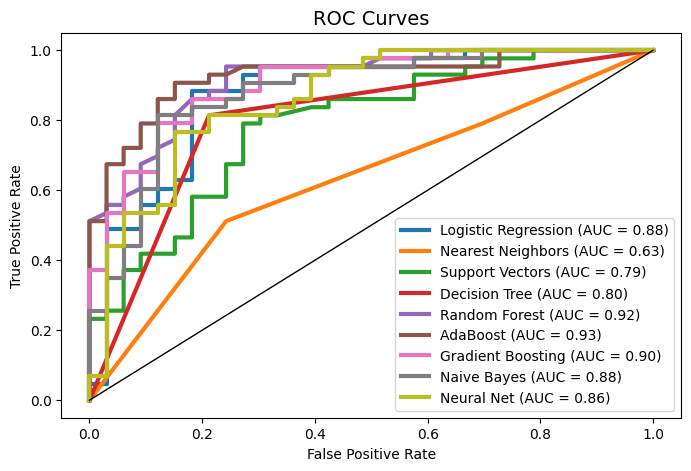

In [71]:
def roc_auc_curve(names, classifiers, colors, diag_color="black"):
    plt.figure(figsize=(8, 5))

    for name, clf, color in zip(names, classifiers, colors):
        clf.fit(X_train, y_train)
        fpr, tpr, _ = roc_curve(y_val, clf.predict_proba(X_val)[:, 1])
        plt.plot(fpr, tpr, lw=3, label=f"{name} (AUC = {auc(fpr, tpr):.2f})", color=color)

    plt.plot([0, 1], [0, 1], diag_color, lw=1)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves", fontsize=14)
    plt.legend(loc="lower right")

colors = plt.cm.tab10.colors
roc_auc_curve(names, classifiers, colors, diag_color='black')


In [60]:
def score_summary(names, classifiers):
    cols = ["Classifier", "Accuracy", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)

        accuracy = accuracy_score(y_val, pred)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, pred_proba)

        cm = confusion_matrix(y_val, pred)
        recall = cm[1,1] / (cm[1,1] + cm[1,0])
        precision = cm[1,1] / (cm[1,1] + cm[0,1])
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy * 100, recall, precision, f1]], columns=cols)


        data_table = pd.concat([data_table, df], ignore_index=True)

    return data_table.round(2)


performance_summary = score_summary(names, classifiers).sort_values(by="Accuracy", ascending=True)
performance_summary


,Classifier,Accuracy,Recall,Precision,F1
1,Nearest Neighbors,61.84,0.51,0.73,0.60
2,Support Vectors,68.42,0.86,0.67,0.76
8,Neural Net,68.42,0.56,0.83,0.67
3,Decision Tree,80.26,0.81,0.83,0.82
6,Gradient Boosting,80.26,0.88,0.79,0.84
0,Logistic Regression,81.58,0.88,0.81,0.84
7,Naive Bayes,82.89,0.91,0.81,0.86
4,Random Forest,84.21,0.91,0.83,0.87
5,AdaBoost,86.84,0.93,0.85,0.89


Adaboost showed highest accuracy of 86.84% and 0.93 recall. Most of the classifiers showed performance above 80%.
Nearest neighbours showed lowest performance in terms of both accuracy and f1 score. RF and NB showed recall of 0.91.

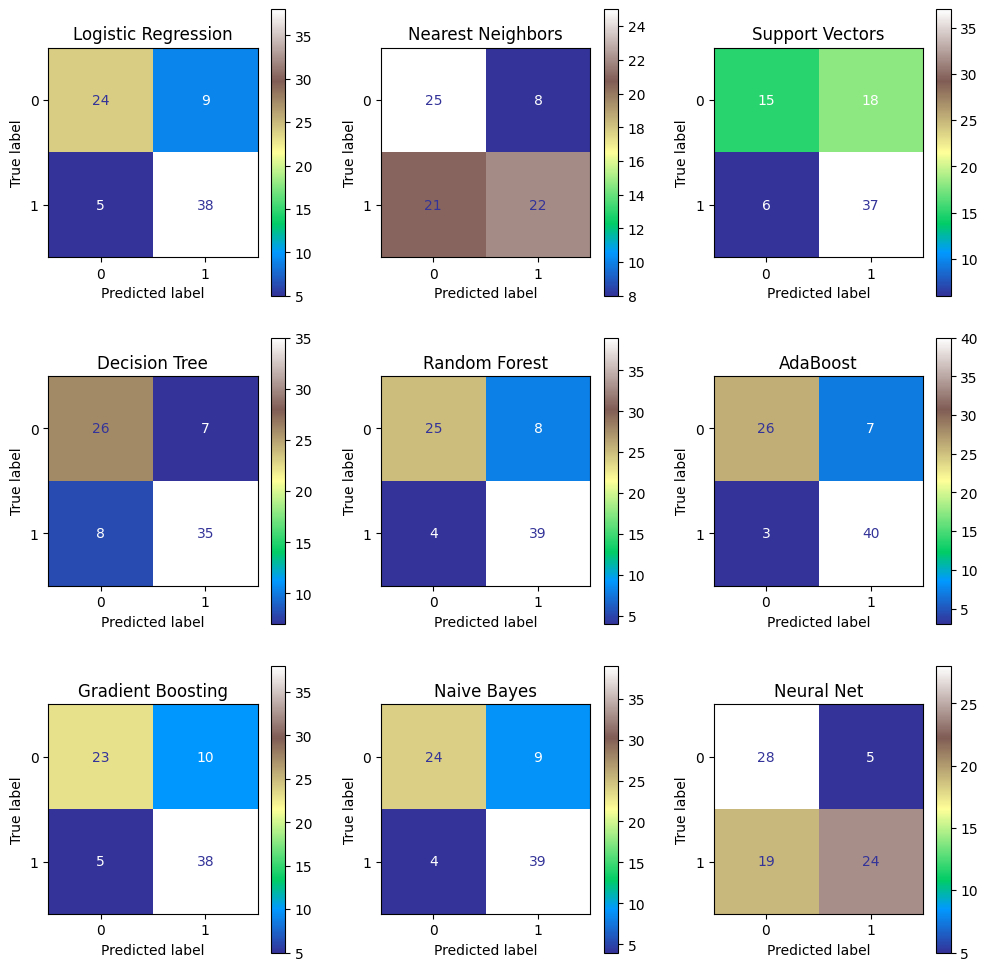

In [59]:
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    fig, axes = plt.subplots(nrows, ncols, figsize=(fig_a, fig_b))
    for ax, clf, name in zip(axes.flatten(), classifiers, names):
        ConfusionMatrixDisplay(confusion_matrix(y_val, clf.fit(X_train, y_train).predict(X_val))).plot(ax=ax, cmap="terrain")
        ax.set_title(name)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(names, classifiers, 3, 3, 10, 10)

